## Swing Up and Stabilize the Cube with Traj. Opt. and Qp controller

In [1]:
import math
import numpy as np
import time, random
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML
from pydrake.math import sin, cos
from pydrake.all import *
from underactuated import (FindResource, PlanarRigidBodyVisualizer)

In [2]:
%reload_ext autoreload
%autoreload 2
from dynamics_nd import *
from visualizer import *
from optimization import *
from plotting import *

In [3]:
vis = MeshcatCubeVisualizer()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/


In [4]:
# no cost, just constraints
dimension = 2
traj, input_traj, force_traj, time_array = swing_up(dimension)

Initial State: (0.0, 0.0, 0.0, 0, 0, 0, 0, 0)
Final State: (-0.5, 0.20710678118654757, 0.7853981633974483, 0, 0, 0, 0, 0)
Number of decision vars 859
SolutionResult.kSolutionFound


In [5]:
# linear interpolation
steps_per_sec = 60
sec = time_array[-1]
num_steps = sec*steps_per_sec
x_interp = np.linspace(0,sec,num_steps)

interp_traj = np.empty((len(x_interp), len(traj[0])))
for i in range(len(traj[0])):
    interp_traj[:,i] = np.interp(x_interp, time_array, traj[:,i])

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  """


In [209]:
# trajectory found, but remove the aliasing
print("Time of swing up: {} sec".format(time_array[-1]))
dt = x_interp[1] - x_interp[0]
for i in range(len(interp_traj)):
    vis.draw_transformation(interp_traj[i,:],dimension)
    time.sleep(dt)

Time of swing up: 14.6955453387 sec


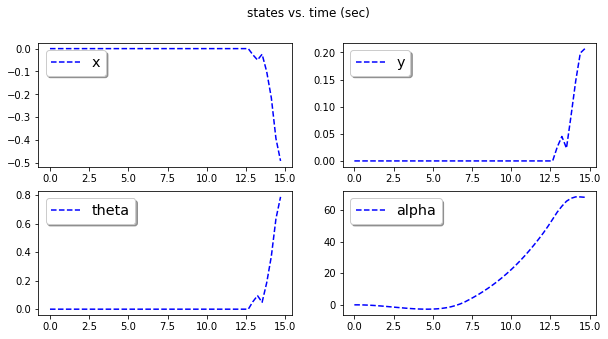

In [7]:
plot_states(traj, time_array, dimension)

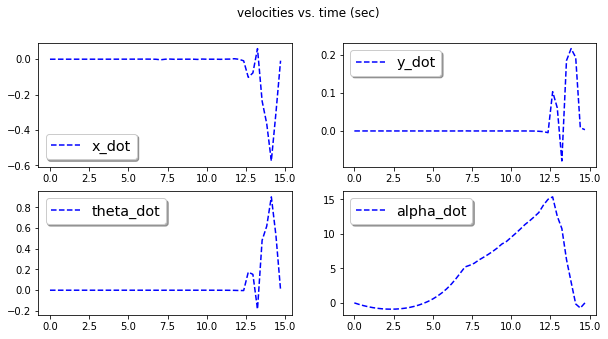

In [8]:
plot_vels(traj, time_array, dimension)

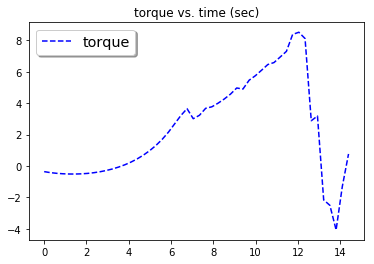

In [9]:
input_plot(input_traj, time_array, dimension)

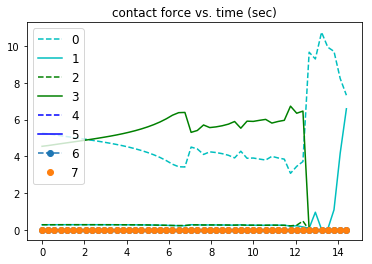

In [10]:
ground_force_plot(force_traj, time_array, dimension)

In [204]:
# desired position
current_state = traj[-1].copy()
# x = 0.; y = 0.0; theta = 0.;
# current_state = get_nd_state((x,y,theta,0,0,0,0,0), dimension)
vis.draw_transformation(current_state,dimension)
x = -0.5; y = .5*(2**.5)-.5; theta = np.pi/4.0;
desired_state = get_nd_state((x,y,theta,0,0,0,0,0), dimension)

In [205]:
sec = 2.0 # number of seconds to simulate for
steps_per_sec = 60.0 # discrete steps in a second
num_steps = sec*steps_per_sec # total number of steps
sec_per_step = sec/num_steps # number of seconds per step
for t in np.linspace(0,sec,num_steps):
    x, u, f = qp_controller(current_state, desired_state, sec_per_step, dimension)
    print(u)
    current_state += get_nd_dynamics(current_state, u, f, dimension)*sec_per_step
    vis.draw_transformation(current_state,dimension)
    time.sleep(sec_per_step)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """


SolutionResult.kSolutionFound
[-100.]
SolutionResult.kSolutionFound
[100.]
SolutionResult.kSolutionFound
[-100.]
SolutionResult.kSolutionFound
[100.]
SolutionResult.kSolutionFound
[-100.]
SolutionResult.kSolutionFound
[100.]
SolutionResult.kSolutionFound
[-100.]
SolutionResult.kSolutionFound
[100.]
SolutionResult.kSolutionFound
[-100.]
SolutionResult.kSolutionFound
[100.]
SolutionResult.kSolutionFound
[-100.]
SolutionResult.kSolutionFound
[100.]
SolutionResult.kSolutionFound
[-100.]
SolutionResult.kSolutionFound
[100.]
SolutionResult.kSolutionFound
[-100.]
SolutionResult.kSolutionFound
[100.]
SolutionResult.kSolutionFound
[-100.]
SolutionResult.kSolutionFound
[100.]
SolutionResult.kSolutionFound
[-100.]
SolutionResult.kSolutionFound
[100.]
SolutionResult.kSolutionFound
[-100.]
SolutionResult.kSolutionFound
[100.]
SolutionResult.kSolutionFound
[-100.]
SolutionResult.kSolutionFound
[100.]
SolutionResult.kSolutionFound
[-100.]
SolutionResult.kSolutionFound
[100.]
SolutionResult.kSolutionF